<a href="https://colab.research.google.com/github/kridtapon/M2-Money-Supply/blob/main/M2_Money_Supply.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import yfinance as yf

In [155]:
# Define the timeframe
start = datetime.datetime(2004, 1, 1)
end = datetime.datetime(2024, 1, 1)

# Download M2 money supply data
m2_data = web.DataReader('M2SL', 'fred', start, end)

# Download inflation (CPI) and GDP data for comparison
inflation_data = web.DataReader('CPIAUCSL', 'fred', start, end)
gdp_data = web.DataReader('GDP', 'fred', start, end)


In [156]:
data_SPX = yf.download("^GSPC" ,start = '2004-01-01',end='2024-01-01',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [157]:
data_Gold = yf.download("GC=F" ,start = '2004-01-01',end='2024-01-01',interval='1d')

[*********************100%***********************]  1 of 1 completed


In [158]:
data_SPX

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,,
2004-01-02,1108.479980,1108.479980,1118.849976,1105.079956,1111.920044,1153200000
2004-01-05,1122.219971,1122.219971,1122.219971,1108.479980,1108.479980,1578200000
2004-01-06,1123.670044,1123.670044,1124.459961,1118.439941,1122.219971,1494500000
2004-01-07,1126.329956,1126.329956,1126.329956,1116.449951,1123.670044,1704900000
2004-01-08,1131.920044,1131.920044,1131.920044,1124.910034,1126.329956,1868400000
...,...,...,...,...,...,...
2023-12-22,4754.629883,4754.629883,4772.939941,4736.770020,4753.919922,3046770000
2023-12-26,4774.750000,4774.750000,4784.720215,4758.450195,4758.859863,2513910000


In [159]:
data_SPX.columns = ['Adj Close','Close','High','Low','Open','Volume']

In [160]:
#data_monthly = data_SPX.resample("ME").agg({"Open":"first",
 #                                "High":"max",
  #                               "Low":"min",
 #                                "Close":"last",
   #                              "Volume":"sum"})

data_monthly = data_SPX.resample("MS").agg({
    "Open": "first",
    "High": "max",
    "Low": "min",
    "Close": "last",
    "Volume": "sum"
})

In [161]:
data_monthly

,Open,High,Low,Close,Volume
Date,,,,,
2004-01-01,1111.920044,1155.380005,1105.079956,1131.130005,32820000000
2004-02-01,1131.130005,1158.979980,1124.439941,1144.939941,27985600000
2004-03-01,1144.939941,1163.229980,1087.160034,1126.209961,33597900000
2004-04-01,1126.209961,1150.569946,1107.229980,1107.300049,31611900000
2004-05-01,1107.300049,1127.739990,1076.319946,1120.680054,29326400000
...,...,...,...,...,...
2023-08-01,4578.830078,4584.620117,4335.310059,4507.660156,86840820000
2023-09-01,4530.600098,4541.250000,4238.629883,4288.049805,73482980000
2023-10-01,4284.520020,4393.569824,4103.779785,4193.799805,83519460000


In [162]:
df_SPX = data_monthly["Open"]

In [163]:
df_SPX

,Open
Date,
2004-01-01,1111.920044
2004-02-01,1131.130005
2004-03-01,1144.939941
2004-04-01,1126.209961
2004-05-01,1107.300049
...,...
2023-08-01,4578.830078
2023-09-01,4530.600098
2023-10-01,4284.520020


In [164]:
data_Gold.columns = ['Adj Close','Close','High','Low','Open','Volume']

In [165]:
#data_monthly_Gold = data_Gold.resample("ME").agg({"Open":"first",
  #                               "High":"max",
    #                             "Low":"min",
    #                             "Close":"last",
     #                            "Volume":"sum"})

data_monthly_Gold = data_Gold.resample("MS").agg({
    "Open": "first",
    "High": "max",
    "Low": "min",
    "Close": "last",
    "Volume": "sum"
})

In [166]:
df_Gold = data_monthly_Gold["Open"]

In [167]:
df_Gold

,Open
Date,
2004-01-01,415.700012
2004-02-01,403.000000
2004-03-01,396.399994
2004-04-01,427.200012
2004-05-01,387.000000
...,...
2023-08-01,1964.900024
2023-09-01,1950.000000
2023-10-01,1844.099976


In [168]:
m2_data

,M2SL
DATE,
2004-01-01,6082.2
2004-02-01,6121.9
2004-03-01,6158.0
2004-04-01,6199.1
2004-05-01,6275.9
...,...
2023-09-01,20681.4
2023-10-01,20662.5
2023-11-01,20675.8


In [34]:
m2_data = m2_data.ffill()
df_SPX = df_SPX.ffill()
df_Gold = df_Gold.ffill()


m2_data_annual = m2_data.resample('A').last()
df_SPX_annual = df_SPX.resample('A').last()
df_Gold_annual = df_Gold.resample('A').last()

<ipython-input-34-fab5d4b4b7e6>:6: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  m2_data_annual = m2_data.resample('A').last()
<ipython-input-34-fab5d4b4b7e6>:7: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_SPX_annual = df_SPX.resample('A').last()
<ipython-input-34-fab5d4b4b7e6>:8: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_Gold_annual = df_Gold.resample('A').last()


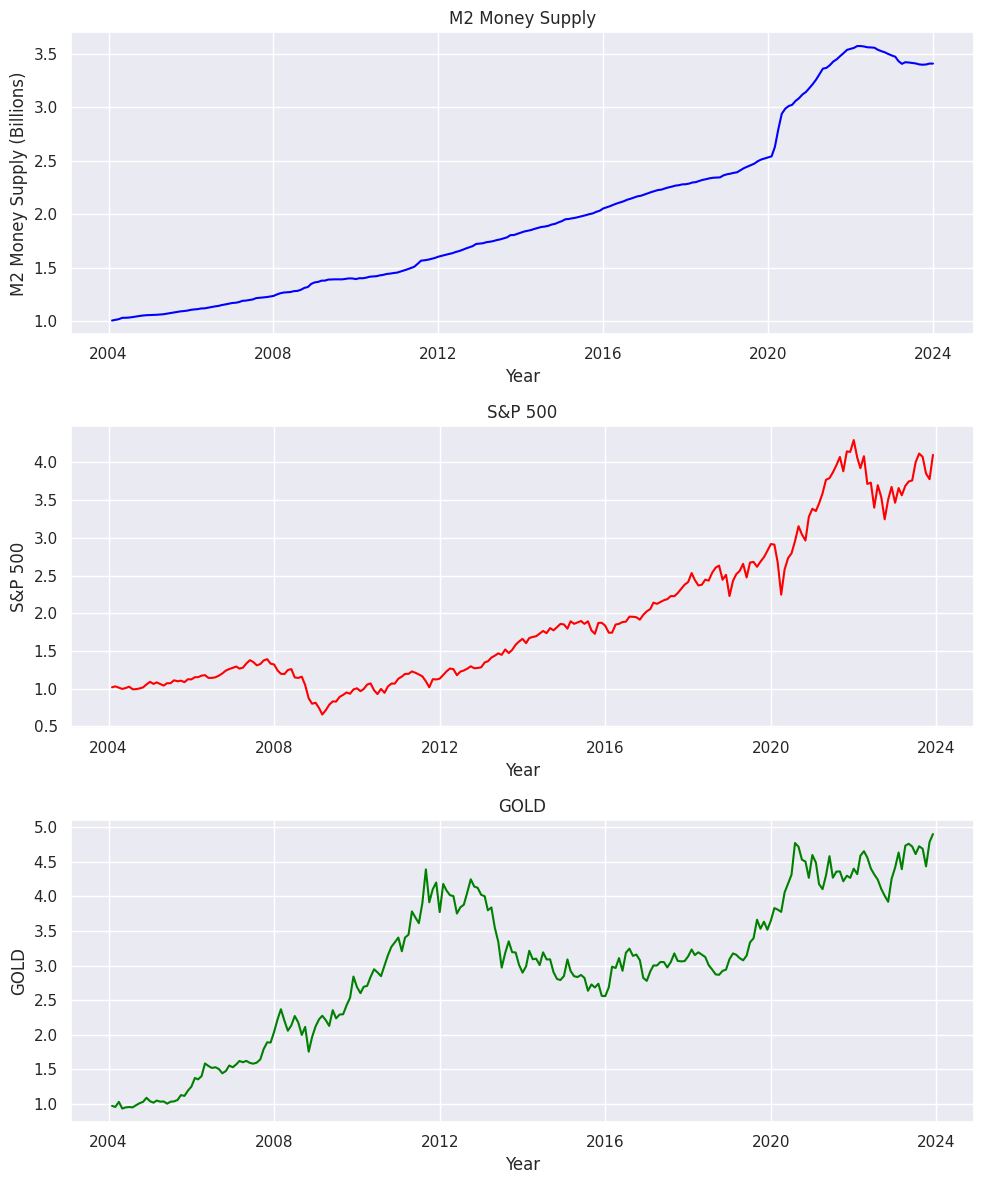

In [181]:
# Set plot style
sns.set(style="darkgrid")

# Create subplots for M2, Inflation, and GDP
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

# Plot M2 money supply
ax[0].plot(m2_data.index, (m2_data.pct_change()+1).cumprod(), color='blue')
ax[0].set_title('M2 Money Supply')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('M2 Money Supply (Billions)')

# Plot Inflation rate
ax[1].plot(df_SPX.index, (df_SPX.pct_change()+1).cumprod(), color='red')
ax[1].set_title('S&P 500')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('S&P 500')

# Plot GDP
ax[2].plot(df_Gold.index, (df_Gold.pct_change()+1).cumprod(), color='green')
ax[2].set_title('GOLD')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('GOLD')

plt.tight_layout()
plt.show()

In [180]:
df_Gold

,Open
Date,
2004-01-01,415.700012
2004-02-01,403.000000
2004-03-01,396.399994
2004-04-01,427.200012
2004-05-01,387.000000
...,...
2023-08-01,1964.900024
2023-09-01,1950.000000
2023-10-01,1844.099976


In [170]:
#m2_ret = m2_data.pct_change()
#SPX_ret = df_SPX.pct_change()
#Gold_ret = df_Gold.pct_change()

In [171]:
m2_ret

,M2SL
DATE,
2004-01-01,NaN
2004-02-01,0.006527
2004-03-01,0.005897
2004-04-01,0.006674
2004-05-01,0.012389
...,...
2023-09-01,-0.002590
2023-10-01,-0.000914
2023-11-01,0.000644


In [172]:
SPX_ret

,Open
Date,
2004-01-01,NaN
2004-02-01,0.017276
2004-03-01,0.012209
2004-04-01,-0.016359
2004-05-01,-0.016791
...,...
2023-08-01,0.028840
2023-09-01,-0.010533
2023-10-01,-0.054315


In [173]:
Gold_ret

,Open
Date,
2004-01-01,NaN
2004-02-01,-0.030551
2004-03-01,-0.016377
2004-04-01,0.077699
2004-05-01,-0.094101
...,...
2023-08-01,0.024506
2023-09-01,-0.007583
2023-10-01,-0.054308


In [174]:
# Assuming df_m2sl, df_spx, and df_gc contain the respective data:
# Ensure 'DATE' or 'Date' is the index for each dataframe
#m2_ret.set_index('DATE', inplace=True)
#SPX_ret.set_index('Date', inplace=True)
#Gold_ret.set_index('Date', inplace=True)

# Rename columns to avoid conflicts when merging
#SPX_ret.rename(columns={"Close": "S&P 500"}, inplace=True)
#Gold_ret.rename(columns={"Close": "Gold"}, inplace=True)

SPX_ret.name = "S&P 500"
Gold_ret.name = "Gold"

# Merge the dataframes on their index (Date)
combined_df = pd.concat([m2_ret, SPX_ret, Gold_ret], axis=1)

# If you want to fill missing values, for example, forward-fill:
combined_df.fillna(method='ffill', inplace=True)

<ipython-input-174-9ac932d19b84>:18: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method='ffill', inplace=True)


In [182]:
df_SPX.name = "S&P 500"
df_Gold.name = "Gold"

# Merge the dataframes on their index (Date)
combined_df = pd.concat([m2_data, df_SPX, df_Gold], axis=1)

# If you want to fill missing values, for example, forward-fill:
combined_df.fillna(method='ffill', inplace=True)

<ipython-input-182-a91afa15790f>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_df.fillna(method='ffill', inplace=True)


In [183]:
combined_df

,M2SL,S&P 500,Gold
2004-01-01,6082.2,1111.920044,415.700012
2004-02-01,6121.9,1131.130005,403.000000
2004-03-01,6158.0,1144.939941,396.399994
2004-04-01,6199.1,1126.209961,427.200012
2004-05-01,6275.9,1107.300049,387.000000
...,...,...,...
2023-09-01,20681.4,4530.600098,1950.000000
2023-10-01,20662.5,4284.520020,1844.099976
2023-11-01,20675.8,4201.270020,1990.500000
2023-12-01,20725.5,4559.430176,2038.300049


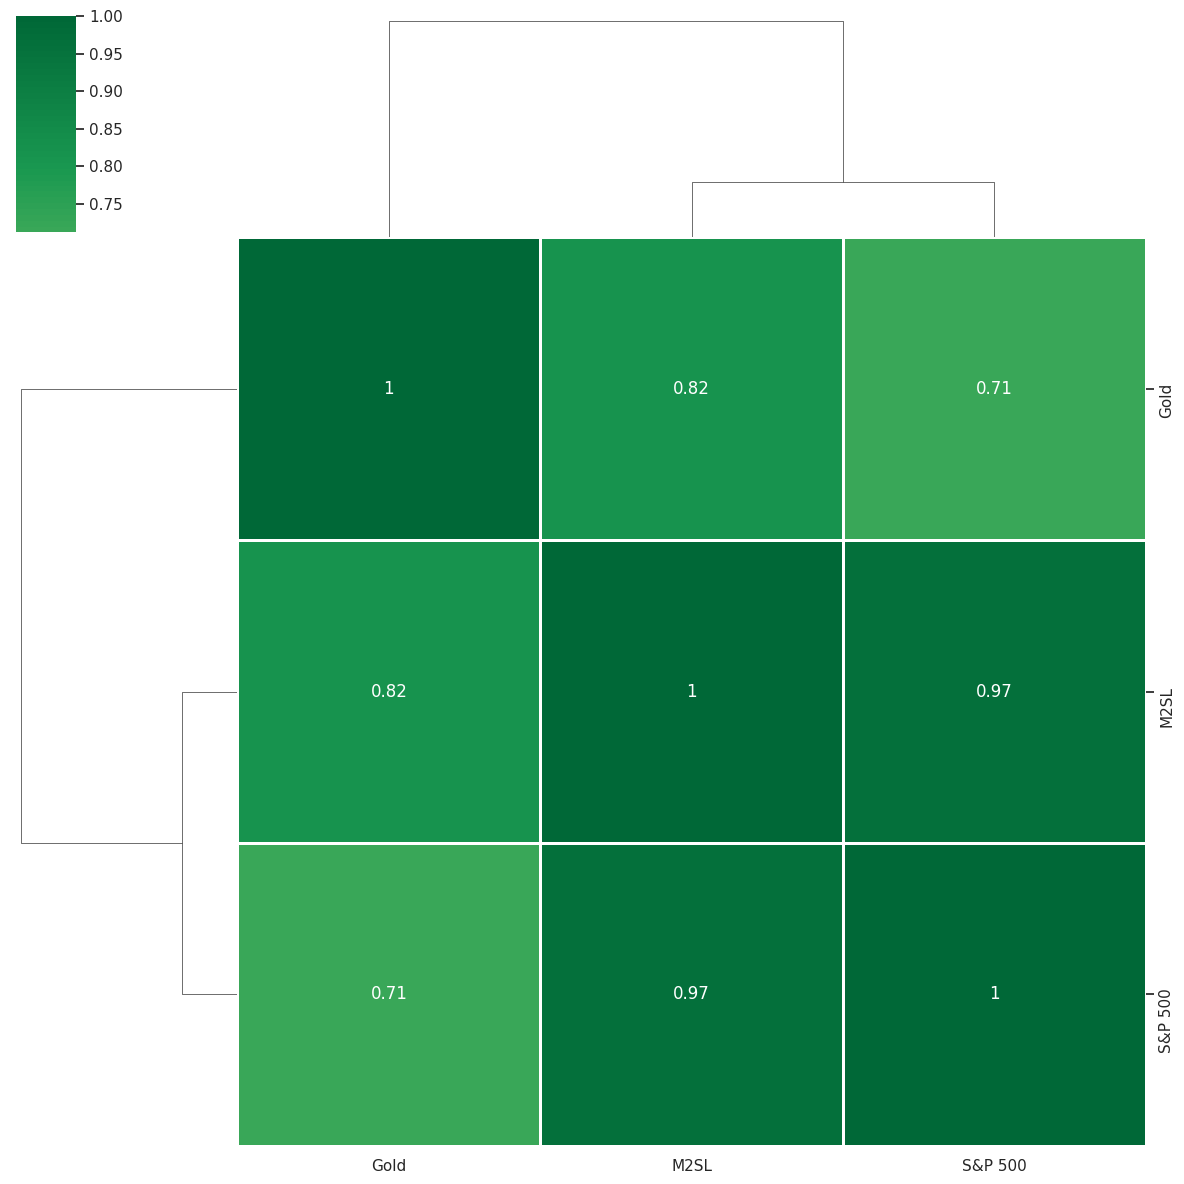

In [201]:
g = sns.clustermap(combined_df.corr(), method='ward', center = 0.0, cmap="RdYlGn",
                   dendrogram_ratio=(0.2, 0.2),
                   linewidths=0.75, figsize=(12, 12),
                   annot = True)

In [192]:
combined_df.pct_change()+1

,M2SL,S&P 500,Gold
2004-01-01,NaN,NaN,NaN
2004-02-01,1.006527,1.017276,0.969449
2004-03-01,1.005897,1.012209,0.983623
2004-04-01,1.006674,0.983641,1.077699
2004-05-01,1.012389,0.983209,0.905899
...,...,...,...
2023-09-01,0.997410,0.989467,0.992417
2023-10-01,0.999086,0.945685,0.945692
2023-11-01,1.000644,0.980570,1.079388
2023-12-01,1.002404,1.085250,1.024014


In [193]:
geo_ret = (combined_df.pct_change()+1).cumprod()

<Axes: >

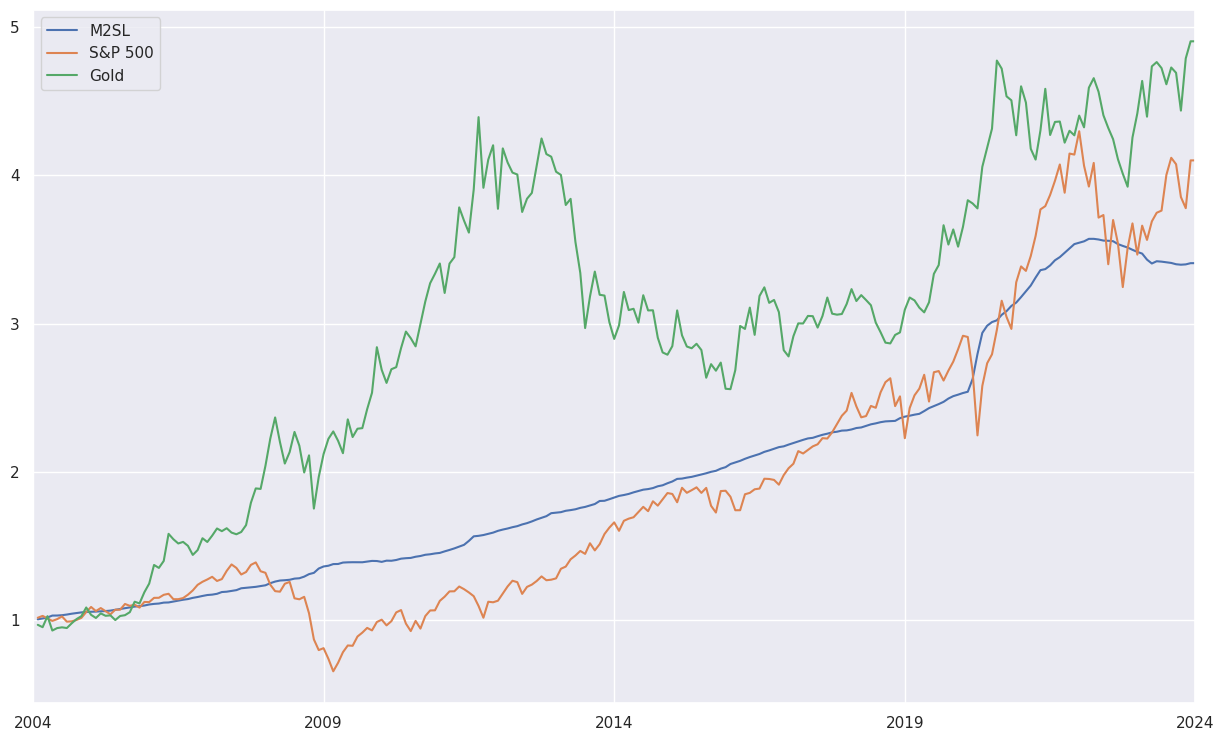

In [194]:
geo_ret.plot(figsize=(15,9))

Text(0, 0.5, 'Cumulative Growth')

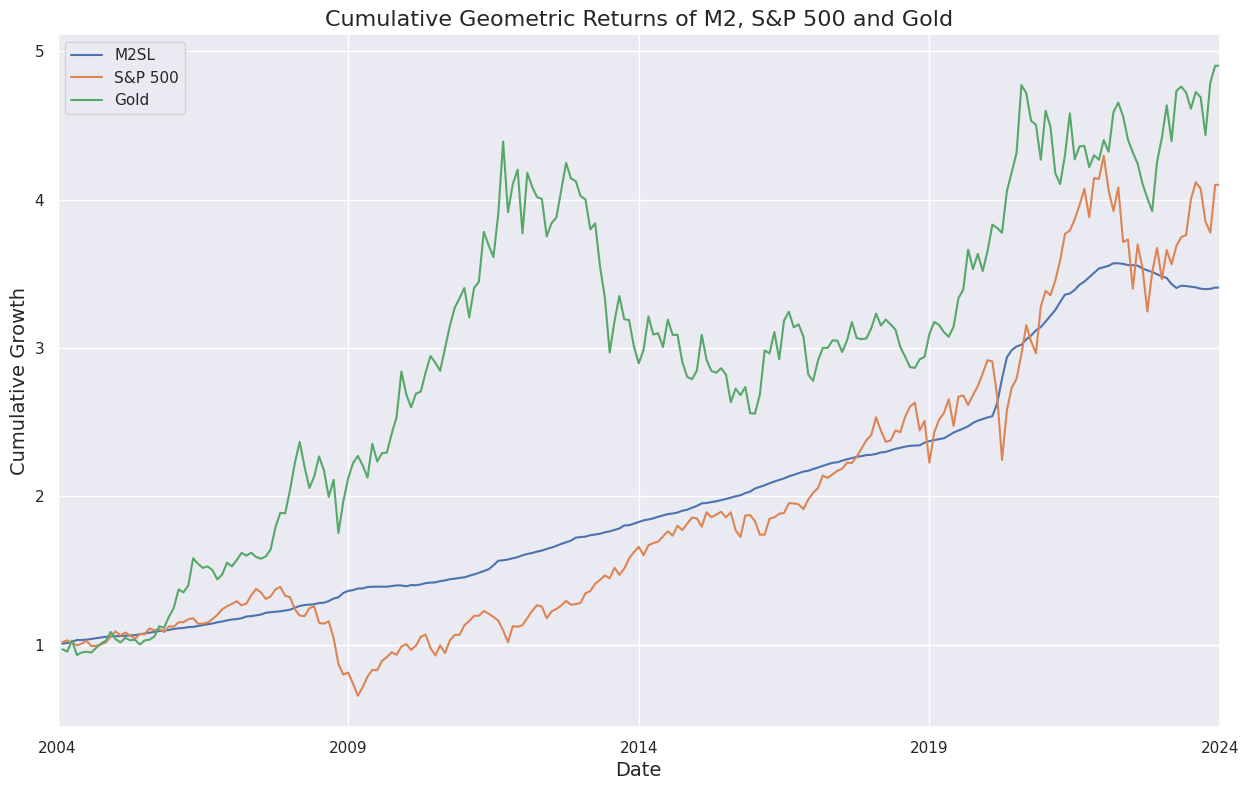

In [200]:
# Plot cumulative geometric returns
ax = geo_ret.plot(figsize=(15, 9))
ax.set_title("Cumulative Geometric Returns of M2, S&P 500 and Gold", fontsize=16)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Cumulative Growth", fontsize=14)

In [197]:
combined_df

,M2SL,S&P 500,Gold
2004-01-01,6082.2,1111.920044,415.700012
2004-02-01,6121.9,1131.130005,403.000000
2004-03-01,6158.0,1144.939941,396.399994
2004-04-01,6199.1,1126.209961,427.200012
2004-05-01,6275.9,1107.300049,387.000000
...,...,...,...
2023-09-01,20681.4,4530.600098,1950.000000
2023-10-01,20662.5,4284.520020,1844.099976
2023-11-01,20675.8,4201.270020,1990.500000
2023-12-01,20725.5,4559.430176,2038.300049


In [202]:
# Perform a correlation analysis
correlation_matrix = combined_df.corr()

             M2SL   S&P 500      Gold
M2SL     1.000000  0.967924  0.819622
S&P 500  0.967924  1.000000  0.712589
Gold     0.819622  0.712589  1.000000


In [204]:
correlation_matrix

,M2SL,S&P 500,Gold
M2SL,1.000000,0.967924,0.819622
S&P 500,0.967924,1.000000,0.712589
Gold,0.819622,0.712589,1.000000


In [203]:
# Run a linear regression model to predict inflation based on M2
X = sm.add_constant(combined_df['M2SL'])  # Add constant to the model
y = combined_df['S&P 500']
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                S&P 500   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     3547.
Date:                Mon, 09 Dec 2024   Prob (F-statistic):          2.23e-145
Time:                        08:17:21   Log-Likelihood:                -1694.3
No. Observations:                 241   AIC:                             3393.
Df Residuals:                     239   BIC:                             3400.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -512.7584     47.944    -10.695      0.0

In [ ]:
# Handle missing values by forward filling
m2_data = m2_data.ffill()
inflation_data = inflation_data.ffill()
gdp_data = gdp_data.ffill()

# Resample data to annual frequency for simplicity
m2_data_annual = m2_data.resample('A').last()
inflation_data_annual = inflation_data.resample('A').last()
gdp_data_annual = gdp_data.resample('A').last()


<ipython-input-3-7b934a0eaf5e>:7: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  m2_data_annual = m2_data.resample('A').last()
<ipython-input-3-7b934a0eaf5e>:8: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  inflation_data_annual = inflation_data.resample('A').last()
<ipython-input-3-7b934a0eaf5e>:9: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  gdp_data_annual = gdp_data.resample('A').last()


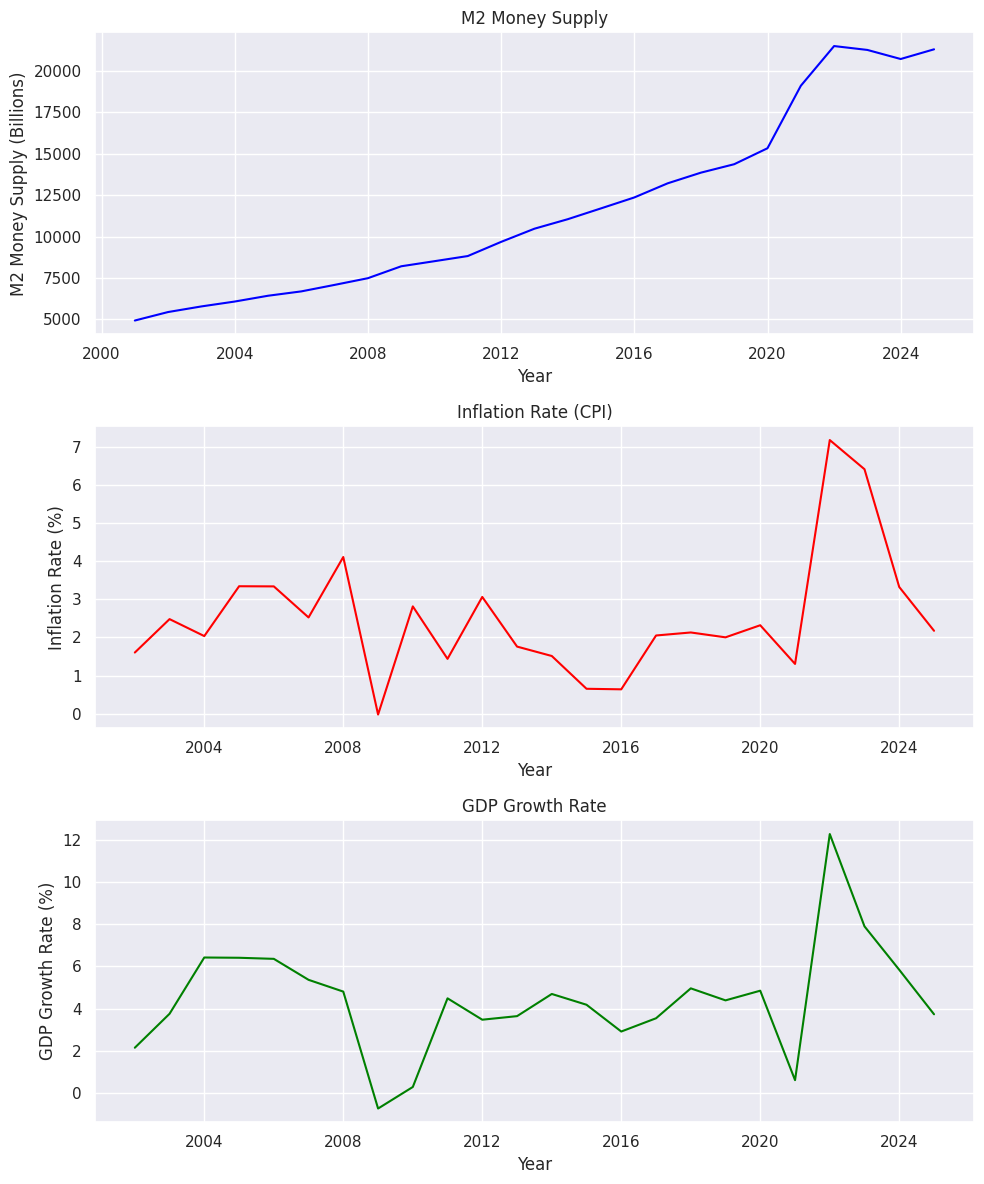

In [ ]:
# Set plot style
sns.set(style="darkgrid")

# Create subplots for M2, Inflation, and GDP
fig, ax = plt.subplots(3, 1, figsize=(10, 12))

# Plot M2 money supply
ax[0].plot(m2_data_annual.index, m2_data_annual, color='blue')
ax[0].set_title('M2 Money Supply')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('M2 Money Supply (Billions)')

# Plot Inflation rate
ax[1].plot(inflation_data_annual.index, inflation_data_annual.pct_change() * 100, color='red')
ax[1].set_title('Inflation Rate (CPI)')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Inflation Rate (%)')

# Plot GDP
ax[2].plot(gdp_data_annual.index, gdp_data_annual.pct_change() * 100, color='green')
ax[2].set_title('GDP Growth Rate')
ax[2].set_xlabel('Year')
ax[2].set_ylabel('GDP Growth Rate (%)')

plt.tight_layout()
plt.show()

In [ ]:
# Merge the data into one DataFrame
data = pd.concat([m2_data_annual, inflation_data_annual, gdp_data_annual], axis=1)
data.columns = ['M2', 'Inflation', 'GDP']

# Drop any rows with missing values
data = data.dropna()

# Perform a correlation analysis
correlation_matrix = data.corr()
print(correlation_matrix)

# Run a linear regression model to predict inflation based on M2
X = sm.add_constant(data['M2'])  # Add constant to the model
y = data['Inflation']
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())


                 M2  Inflation       GDP
M2         1.000000   0.971514  0.979772
Inflation  0.971514   1.000000  0.994821
GDP        0.979772   0.994821  1.000000
                            OLS Regression Results                            
Dep. Variable:              Inflation   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     386.5
Date:                Sun, 08 Dec 2024   Prob (F-statistic):           7.02e-16
Time:                        10:10:02   Log-Likelihood:                -91.042
No. Observations:                  25   AIC:                             186.1
Df Residuals:                      23   BIC:                             188.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t   